<a href="https://colab.research.google.com/github/Arko04/Colab/blob/main/AI_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=230 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>Project 1</b><br><br>Alireza Karimi</i></font></h1>
                </td>
                <td style="border: none!important;">
        <img width=300 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>



# <b><font color='green'>Part $I$:</font></b>

### Mount my google drive

In [45]:
from google.colab import drive
drive.mount('/content/grive')

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


###find the datapath of our dataset

In [46]:
dataset_path = "/content/grive/MyDrive/AI_Project1/Dataset"

### 'Image' module for displaying the images

In [47]:
# from IPython.display import Image

### Show some example images

In [48]:
# Image(filename=Nevus_DIR + "ISIC_0000055.jpg", width = 250,height= 200)

### Import necessary library for working with files

In [49]:
import os

### Print the 3 types of diseases

### To list the names of files and directories within a specified directory path, we use 'os.listdir(dataset_path)

In [50]:
different_skin_conditions = os.listdir(dataset_path)
print (different_skin_conditions)

['Carcinoma', 'Melanoma', 'Nevus']


### Make alist to restore all different image file's paths

In [51]:
conditions = []

### Add the image file's names to its condition item

In [52]:
for condition in different_skin_conditions:

  condition_path = dataset_path + '/' + condition
  pictures_of_condition = os.listdir(condition_path)

  for picture in pictures_of_condition:
    conditions.append((condition, condition_path + '/' + picture))

conditions

[('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028570.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028747.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028677.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028928.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0029082.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028815.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028653.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0029034.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028814.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028994.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028542.jpg'),

### Add essential libaries to work with dataframes and arrays

In [53]:
import pandas as pd
import numpy as np

In [54]:
conditions_df = pd.DataFrame(data=conditions, columns=['condition_type', 'image_name'])
print(conditions_df.head())
print(conditions_df.tail())

  condition_type                                         image_name
0      Carcinoma  /content/grive/MyDrive/AI_Project1/Dataset/Car...
1      Carcinoma  /content/grive/MyDrive/AI_Project1/Dataset/Car...
2      Carcinoma  /content/grive/MyDrive/AI_Project1/Dataset/Car...
3      Carcinoma  /content/grive/MyDrive/AI_Project1/Dataset/Car...
4      Carcinoma  /content/grive/MyDrive/AI_Project1/Dataset/Car...
    condition_type                                         image_name
168          Nevus  /content/grive/MyDrive/AI_Project1/Dataset/Nev...
169          Nevus  /content/grive/MyDrive/AI_Project1/Dataset/Nev...
170          Nevus  /content/grive/MyDrive/AI_Project1/Dataset/Nev...
171          Nevus  /content/grive/MyDrive/AI_Project1/Dataset/Nev...
172          Nevus  /content/grive/MyDrive/AI_Project1/Dataset/Nev...


### Count the number of pictures of all conditions

In [55]:
print("Total number of conditions' pictures in the dataset: ", len(conditions_df))

Total number of conditions' pictures in the dataset:  173


### Count the number of condition's pictures in each category of conditions

In [56]:
condition_count = conditions_df['condition_type'].value_counts()

print("condition's pictures in each category: ")
print(condition_count)

condition's pictures in each category: 
condition_type
Melanoma     64
Nevus        59
Carcinoma    50
Name: count, dtype: int64


In [57]:
import cv2
im_size = 224

images = []
labels = []
count = 0
flag = True
sample = 0
for condition in different_skin_conditions:
    condition_data_path = dataset_path + '/' + condition
    filenames = [i for i in os.listdir(condition_data_path) ]

    for filename in filenames:
        flag = True
        img = cv2.imread(condition_data_path + '/' + filename)
        img = cv2.resize(img, (im_size, im_size))

        # Check if it is a copy
        for i in images:
          diff = cv2.absdiff(img, i)
          sample = diff
          mean_diff = np.mean(diff)
          if mean_diff == 0:
            if flag:
               count+=1
            flag = False
        if(flag):
          images.append(img)
          labels.append(condition)

print(len(labels))
print(len(images))
print(sample)
count


142
142
[[[ 1  3  3]
  [ 3  0  1]
  [ 1  0  1]
  ...
  [ 1  3  2]
  [ 2  1  1]
  [ 0  4  4]]

 [[ 8  2  5]
  [12  0  3]
  [ 8  5  7]
  ...
  [ 2  2  2]
  [ 3  5  5]
  [ 3  3  3]]

 [[ 2  3  3]
  [ 2  4  3]
  [ 4  2  4]
  ...
  [ 4  4  4]
  [11  8  8]
  [ 7  4  4]]

 ...

 [[ 0  3  1]
  [ 5  4  2]
  [ 5  0  5]
  ...
  [ 0  1  1]
  [ 1  2  2]
  [ 2  2  2]]

 [[ 9  1  8]
  [10  2  9]
  [ 5  3  4]
  ...
  [ 2  1  5]
  [ 5  5  5]
  [ 0  0  0]]

 [[ 6  0  5]
  [ 4  0  2]
  [ 4  0  2]
  ...
  [ 0  1  1]
  [ 2  2  2]
  [ 0  0  0]]]


31

### Transform the image into a numpy array

In [58]:
images = np.array(images)
images.shape

(142, 224, 224, 3)

### Scale and normalize our data

In [59]:
images = images / 255.0

### Import necessary classes and library to do some preprocessing like label encoding and one-hot encoding

In [60]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

### Achieve conditions of each picture in our dataframe

In [61]:
# y=conditions_df["condition_type"].values
y = np.array(labels)
y

array(['Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma',
       'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma',
       'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma',
       'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma',
       'Mela

* #### Label encoding

Used to convert categorical data (data with distinct labels or categories) into numerical form.

**fit_transform method:**

* **Fitting:** It learns the unique categories in the 'y' data. For example, if 'y' contains categories like ['Nevus', 'Carcinoma', 'Melanoma'], the fit step assigns the integer labels 0, 1, and 2 to these categories, respectively.

* **Transforming:** After learning the unique categories, it replaces each category in the 'y' data with its corresponding numerical label. So, if 'y' originally contained values like ['Nevus', 'Carcinoma', 'Melanoma'], after the transformation, 'y' will contain the numerical labels assigned in the fitting step.

In [62]:
# Instantiate from the LabelEncoder class to work with
y_labelencoder = LabelEncoder ()
# Perform label encoding on the y data
y = y_labelencoder.fit_transform (y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* #### One-hot encoding

In one-hot encoding, each category is represented by a separate binary column (either 0 or 1). If there are 'n' categories, 'n' new binary columns are created. When a data point belongs to a particular category, the corresponding binary column for that category will have a value of 1, and all other columns will have a value of 0.

### At first we need to reshape the y data

#### **reshape(-1,1)**

* **first arqument:** the number of rows

* **second argument**: the number of columns

In Python, using "-1" in a specific context, like the reshape() function, means you are specifying the number of elements in that dimension of the array. This feature allows you to maintain the total number of elements in the array while changing its shape or dimensions.

In [63]:
y=y.reshape(-1,1)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

#### **OneHotEncoder(categories='auto', sparse=False)**
* **categories='auto':** This argument tells the OneHotEncoder function to automatically find the categories in the data.

* **sparse=False:** This argument specifies the output format. When you set sparse=False, the function will return the one-hot encoded output in a dense format, like below output.

In [64]:
# Instantiate an object from the OneHotEncoder class to work with
onehotencoder=OneHotEncoder(categories='auto', sparse=False)
# Apply the one-hot encoding to the data
Y= onehotencoder.fit_transform(y)

print(f"The dimentions before one-hot encoding: {y.shape}")

print(f"The dimentions after one-hot encoding: {Y.shape}")

Y

The dimentions before one-hot encoding: (142, 1)
The dimentions after one-hot encoding: (142, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

**random_state=1:** The purpose of random_state is to ensure reproducibility of the shuffling results. As long as you use the same random_state value across different runs of your code, you will get the same shuffled order.

When you set random_state to a specific value, you are effectively setting a seed for the random number generator. This seed ensures that the same sequence of random numbers will be generated every time the code is executed

In [65]:
from sklearn.utils import shuffle

images, Y = shuffle(images, Y, random_state=1)

Y

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(images, Y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(99, 224, 224, 3)
(99, 3)
(43, 224, 224, 3)
(43, 3)


### Necessary libraries and modules and classes to work with neural network models

In [83]:
from keras.models import Model

from keras.layers import Input, Add, Dense, Activation,BatchNormalization, Flatten, Conv2D, Dropout, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

from keras import Sequential

### Import the library to initialize our parameters (weights and biases)

In [68]:
from keras.initializers import glorot_uniform, he_normal

### Import the library to plot the results

In [69]:
import matplotlib.pyplot as plt

### Function to show the accuracy of the model in each epoch

In [70]:
def display_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train accuracy', 'Validation accuracy','Train loss'], loc='upper right')
  # plt.ylim(ymax=2, ymin=0)
  plt.show()

### Function to show the loss of the model in each epoch

In [71]:
def display_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train loss', 'Validation loss'], loc='upper left')
  # plt.ylim(ymax=3, ymin=0)
  plt.show()


### Compute the confusion matrix and classification report

In [72]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def compute_confusion_matrix_and_classification_report(model):
  Y_pred = model.predict(X_valid)
  y_pred = np.argmax(Y_pred, axis=1)
  y_val1=np.argmax(y_valid,axis=1)
  print('\nConfusion Matrix')
  cm=confusion_matrix(y_val1, y_pred)
  print(cm)

  print('\nClassification Report')
  class_labels = different_skin_conditions

  report = classification_report(y_val1, y_pred, target_names=class_labels)
  print(report)

### Necessary blocks and models for ResNet50

#### Identity block

In [73]:
def identity_block(X, f, filters, stage, block):



    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'


    F1, F2, F3 = filters


    X_shortcut = X


    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)


    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

#### Convolutional block

In [74]:
def convolutional_block(X, f, filters, stage, block, s = 2):


    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'


    F1, F2, F3 = filters


    X_shortcut = X



    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)



    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)



    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)



    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)


    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

#### The main ResNet50 model

In [75]:
def ResNet50_from_scratch(input_shape=(224, 224, 3), classes=3):



    X_input = Input(input_shape)


    X = ZeroPadding2D((3, 3))(X_input)


    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)


    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)



    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')




    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')



# --------------------------------------------------------------------------------------------------------------



    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')


    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')


    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')


    X = AveragePooling2D((2,2), name="avg_pool")(X)




    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)



    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model


#**Note:**
Train the entire model (frozen layers + new layers) with a very low learning rate

A common starting point for the learning rate in transfer learning is between 1e-4 (0.0001) and 1e-5 (0.00001). This lower range helps in fine-tuning the pre-trained weights without making significant changes, allowing the new layers to learn from your small dataset.

Pre-trained Model Strength: If the pre-trained model is already very strong on a similar task, you might use an even lower learning rate (e.g., 1e-6) to avoid disturbing the well-learned weights.

### Make ResNet50 model from scratch

In [76]:
# model = ResNet50_from_scratch(input_shape = (224, 224, 3), classes = 3)

### OR Make ResNet50 model by using built-in functions and methods of tensorflow

#### import the built in class for ResNet50 model

In [77]:
from tensorflow.keras.applications import ResNet50

#### Instantiate from the ResNet50 class as our base model

In [78]:
ResNet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#### Make the layers of ResNet50 base model untrainable

In [79]:
for layer in ResNet50_base.layers:
    layer.trainable = False

#### Make our own model by adding some layers

In [90]:
ResNet50_model = Sequential([
    ResNet50_base,
    Flatten(),
    BatchNormalization(),
    Dense(512, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

### Compile the model with adam optimizer and for multiclass classification, we have categorical_crossentropy loss function and we calculate the accuracy of our model

In [91]:
ResNet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Review the structure of model

In [92]:
ResNet50_model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_5[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 64)         9472      ['zero_padding2d_2[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1[0][0]']        

### Find the number of layers used in our ResNet50 model

In [93]:
print(len(ResNet50_base.layers))
print(len(ResNet50_model.layers))

175
16


In [94]:
history=ResNet50_model.fit(X_train, y_train, batch_size=7, epochs=1, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/40
15/15 [==============================] - 43s 304ms/step - loss: 9.5004 - accuracy: 0.4040 - val_loss: 1.1765 - val_accuracy: 0.3256
Epoch 2/40
15/15 [==============================] - 2s 101ms/step - loss: 5.2911 - accuracy: 0.4646 - val_loss: 1.3124 - val_accuracy: 0.3488
Epoch 3/40
15/15 [==============================] - 2s 101ms/step - loss: 2.6381 - accuracy: 0.4949 - val_loss: 2.4839 - val_accuracy: 0.3488
Epoch 4/40
15/15 [==============================] - 2s 101ms/step - loss: 2.9361 - accuracy: 0.4747 - val_loss: 1.8908 - val_accuracy: 0.3488
Epoch 5/40
15/15 [==============================] - 2s 107ms/step - loss: 3.4749 - accuracy: 0.5354 - val_loss: 2.6339 - val_accuracy: 0.3488
Epoch 6/40
15/15 [==============================] - 2s 118ms/step - loss: 2.9272 - accuracy: 0.5657 - val_loss: 11.3683 - val_accuracy: 0.3488
Epoch 7/40
15/15 [==============================] - 2s 112ms/step - loss: 2.7027 - accuracy: 0.5960 - val_loss: 4.1007 - val_accuracy: 0.3488
Epoc

### Evaluate the model

In [95]:
loss, accuracy = ResNet50_model.evaluate(X_valid, y_valid)

2/2 [==============================] - 3s 1s/step - loss: 2.6853 - accuracy: 0.5814


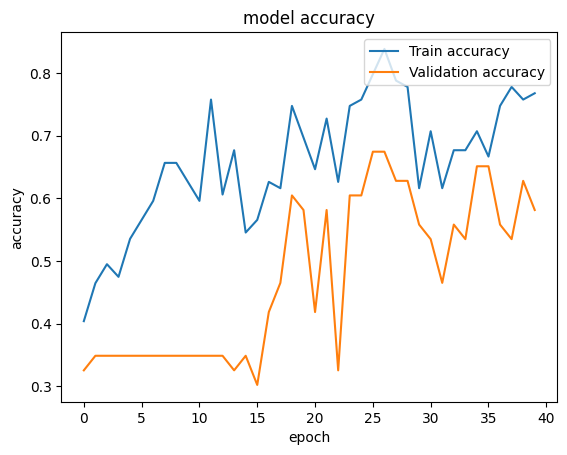

In [96]:
display_accuracy(history)

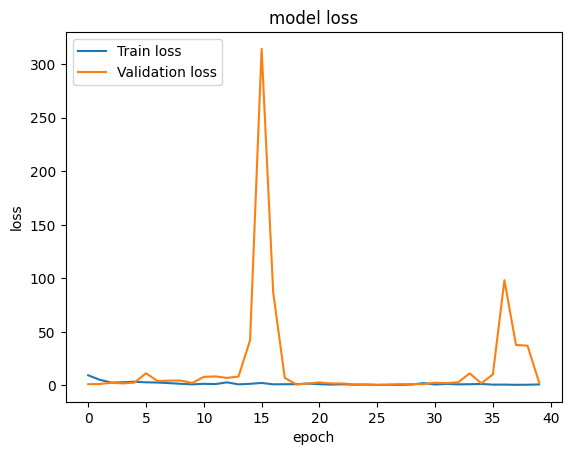

In [97]:
display_loss(history)

In [98]:
compute_confusion_matrix_and_classification_report(ResNet50_model)

2/2 [==============================] - 1s 117ms/step

Confusion Matrix
[[14  0  1]
 [ 8  1  5]
 [ 4  0 10]]

Classification Report
              precision    recall  f1-score   support

   Carcinoma       0.54      0.93      0.68        15
    Melanoma       1.00      0.07      0.13        14
       Nevus       0.62      0.71      0.67        14

    accuracy                           0.58        43
   macro avg       0.72      0.57      0.49        43
weighted avg       0.72      0.58      0.50        43



### The previous results:


The result with built-in ResNet50 and some layers added in the end to be trained with batch-size = 7: (epochs = 40) (4 relu, 512 units, he-normal, dropout = 0.5 and batch-normalization)

2/2 [==============================] - 3s 1s/step - loss: 2.6853 - accuracy: 0.5814

The result with built-in ResNet50 and some layers added in the end to be trained: (epochs = 40)

2/2 [==============================] - 1s 1s/step - loss: 5.5320 - accuracy: 0.4651

The result with ResNet50 built from scratch with batch-size = 11: (epochs = 40)

2/2 [==============================] - 0s 64ms/step - loss: 0.8474 - accuracy: 0.6744

The result with ResNet50 built from scratch with batch-size = 9: (epochs = 40)

2/2 [==============================] - 0s 57ms/step - loss: 2.1891 - accuracy: 0.6047

The result with ResNet50 built from scratch with batch-size = 7: (epochs = 40)

* first time:

2/2 [==============================] - 0s 62ms/step - loss: 0.5690 - accuracy: 0.7674

* second time:

2/2 [==============================] - 3s 1s/step - loss: 8.0230 - accuracy: 0.3488

The result with ResNet50 built from scratch with batch-size = 5: (epochs = 40)

2/2 [==============================] - 0s 63ms/step - loss: 0.8860 - accuracy: 0.7209

The result with ResNet50 built from scratch with batch-size = 3: (epochs = 40)

2/2 [==============================] - 0s 69ms/step - loss: 1.8947 - accuracy: 0.3953

The result with ResNet50 built from scratch with batch-size = 1: (epochs = 40)

2/2 [==============================] - 2s 59ms/step - loss: 7.4493 - accuracy: 0.4186

The result with ResNet50 built from scratch with batch-size = 7: (epochs = 100)

* first time:

2/2 [==============================] - 0s 51ms/step - loss: 1.7429 - accuracy: 0.4651

* second time:

2/2 [==============================] - 0s 49ms/step - loss: 0.7368 - accuracy: 0.7674

## With  Data Augmentation

### Import necessary class to do data augmentation

In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Instantiate from the ImageDataGenerator class
**Trainslation**
* Width Shift Range (float): This defines the maximum fraction by which the image can be shifted horizontally.

Shift image up to 10% horizontally

* Height Shift Range (float): This defines the maximum fraction by which the image can be shifted vertically.

Shift image up to 10% vertically

**rotation**

rotation_range=20: Random rotation between -20 and 20 degrees

**horizontal_flip**

 * This parameter enables random horizontal flipping of the images, which can help the model learn to be invariant to the orientation of objects in the images.

**rescale**

 This parameter scales pixel values from their original range (typically 0-255 for images) to a new range. Here, it's set to 1./255, which scales all pixel values between 0 and 1. This helps normalize the data and improve model performance, especially for deep convolutional neural networks.

 rescale=1./255,  # Rescale pixel values to [0, 1]


shear_range: This parameter introduces random shearing transformations to the image. A value between 0 and 1 specifies the maximum shear angle in degrees.


shear_range=0.2,  # Randomly shear images

For example, shear_range=0.2 would introduce random horizontal or vertical shears with angles between -20 degrees and +20 degrees.


zoom_range=0.2,  # Randomly zoom in/out

In [103]:
data_generator = ImageDataGenerator(rescale = 1.0/255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    rotation_range=20,
                                    width_shift_range= 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    # for Color perturbation:
                                    brightness_range=[-0.2, 0.2],  # Adjust brightness randomly
                                    contrast_range=[0.8, 1.2],   # Adjust contrast randomly
                                    saturation_range=[0.8, 1.2],  # Adjust saturation randomly
                                    hue_range=[-0.1, 0.1]        # Adjust hue randomly
                                    )

In [106]:
train_generator = data_generator.flow (X_train, y_train, batch_size = 7)

In [107]:
steps_per_epoch = X_train.shape[0]

#### Make the ResNet50 model with data augmentation

In [ ]:
ResNet50_model_with_augmentation = Sequential([
    ResNet50_base,
    Flatten(),
    BatchNormalization(),
    Dense(512, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [ ]:
ResNet50_model_with_augmentation.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
R_history_with_augmentation = ResNet50_model_with_augmentation.fit_generator(train_generator, steps_per_epoch = steps_per_epoch, epochs = 1,verbose=1, validation_data=(X_valid, y_valid))

In [ ]:
R_loss_with_augmentation, R_accuracy_with_augmentation = ResNet50_model_with_augmentation.evaluate(X_valid, y_valid)

In [ ]:
display_accuracy(R_history_with_augmentation)

In [ ]:
display_loss(R_history_with_augmentation)

In [ ]:
compute_confusion_matrix_and_classification_report(ResNet50_model_with_augmentation)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

### Instantiate VGG16 model

In [ ]:
VGG16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

### Specify that VGG16 layers are not trainable

In [ ]:
for layer in VGG16_base.layers:
    layer.trainable = False

### Add some layers to our base VGG16 model to make it trainable on its new layers

In [ ]:
VGG16_model = Sequential([
    VGG16_base,
    Flatten(),
    BatchNormalization(),
    Dense(512, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

### Compile the VGG16-based model

In [ ]:
VGG16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=VGG16_model.fit(X_train, y_train, batch_size=7, epochs=40, verbose=1, validation_data=(X_valid, y_valid))

### Evalute our model

In [ ]:
loss, accuracy = VGG16_model.evaluate(X_valid, y_valid)

In [ ]:
display_accuracy(history)

In [ ]:
display_loss(history)

In [ ]:
compute_confusion_matrix_and_classification_report(VGG16_model)

### With Data Augmentation

In [ ]:
data_generator = ImageDataGenerator(rescale = 1.0/255, rotation_range=20,  width_shift_range= 0.1, height_shift_range = 0.1, horizontal_flip = True)

In [ ]:
train_generator = data_generator.flow (X_train, y_train, batch_size = 7)

In [ ]:
steps_per_epoch = X_train.shape[0]

In [ ]:
  VGG16_model_with_augmentation.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
VGG16_history_with =   VGG16_model_with_augmentation.fit_generator(train_generator, steps_per_epoch = steps_per_epoch, epochs = 1,verbose=1, validation_data=(X_valid, y_valid))

In [ ]:
VGG16_loss_with, VGG16_accuracy_with = VGG16_model_with_augmentation.evaluate(X_valid, y_valid)

In [ ]:
display_accuracy(VGG16_history_with)

In [ ]:
display_loss(VGG16_history_with)

In [ ]:
compute_confusion_matrix_and_classification_report(VGG16_model_with_augmentation)

### Outline

To use VGG16 and ResNet50 models for image classification tasks in TensorFlow, it is important to preprocess the input images properly, which includes normalizing the pixel values of the images. Here is a general procedure you can follow to train VGG16 and ResNet50 models on the given image datasets:

1. Load and Preprocess the Images:
   - Read the images from the folders (nevus, melanoma, noncancerous).
   - Resize the images to a common size (e.g., 224x224) to match the input shape of the VGG16 and ResNet50 models.
   - Normalize the pixel values of the images to be in the range [0, 1] by dividing the pixel values by 255.0.

2. Create Image Data Generators:
   - Use TensorFlow's `ImageDataGenerator` to load and preprocess images in batches for training and validation.
   - Specify the preprocessing functions including rescaling, data augmentation (optional), and other transformations.

3. Define and Compile the Models:
   - Import pre-trained VGG16 and ResNet50 models from Keras applications.
   - Remove the top layers (include_top=False) to add your custom classifier layer.
   - Add a Global Average Pooling layer followed by a Dense layer for classification.
   - Compile the models with appropriate loss function, optimizer, and metrics.

4. Train the Models:
   - Use the Image Data Generators to flow training and validation data to the model.
   - Train the models on the datasets using `model.fit` by specifying the number of epochs and batch size.

5. Evaluate and Predict:
   - Evaluate the performance of the trained models on a test set using `model.evaluate`.
   - Make predictions on new images using `model.predict`.

By following these steps, you can effectively train VGG16 and ResNet50 models on the given image datasets by properly preprocessing the images, including normalizing the pixel values. This preprocessing step helps in achieving better performance and convergence during model training.

# <b><font color='green'>Part $III$:</font></b>

## Different small dataset

### Use VGG16 as our pre-trained model

In [ ]:
VGG16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

### About ImageNet dataset
* Contains over 14 million high-resolution images
* Images are categorized into more than 20,000 different classes (nouns in WordNet hierarchy)

### Import the small and different dataset of German Traffic Signs Dataset (GTSRB)

This dataset contains around 50,000 images of German traffic signs across 43 different classes. It's a good choice for tasks related to traffic sign recognition in autonomous vehicles or driver assistance systems.

In [ ]:
from sklearn.datasets import fetch_openml

# Download and load the dataset
gtsrb = fetch_openml('GTSRB', version=1)

# Access data and target labels
X = gtsrb.data  # Features (images)
y = gtsrb.target  # Target labels (traffic sign classes)

### Split the data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

### Freeze Base Layers

* Freeze the initial layers (often convolutional layers) of the pre-trained model. These layers extract low-level features like edges and textures, which are generally transferable across different tasks. Freezing prevents these layers from being re-trained on your small dataset, potentially leading to overfitting.

In [ ]:
# Freeze the first 15 layers of VGG16 base model
for layer in VGG16_base.layers[:15]:
  layer.trainable = False

In [ ]:
print(len(VGG16_base.layers))

### Train the Top Layers

* Add new layers on top of the frozen pre-trained model. These new layers will be specific to your classification task and learn from your small dataset.

In [ ]:
x = VGG16_base.output
x = Flatten()(x)

# Add Batch Normalization after flattening
x = BatchNormalization()(x)

# Add Dense layer with ReLU activation and Dropout
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Adjust dropout rate as needed

# Add another Dense layer with ReLU activation and Dropout
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adjust dropout rate as needed

num_classes = X_train.shape[1]
predictions = Dense(units = num_classes, activation='softmax')(x)

VGG16_model1 = Model(inputs=VGG16_base.input, outputs=predictions)

In [ ]:
print(len(VGG16_model.layers))

### Compile our model

Compile the entire model (frozen layers + new layers) with a very low learning rate.

In [ ]:
from tensorflow.keras.optimizers import Adam

VGG16_model1.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

### Data Augmentation

* Artificially increases the size and diversity of your training data, potentially reducing overfitting.

In [ ]:
data_generator = ImageDataGenerator(rescale = 1.0/255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    rotation_range=20,
                                    width_shift_range= 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    brightness_range=[-0.2, 0.2],
                                    contrast_range=[0.8, 1.2],
                                    saturation_range=[0.8, 1.2],
                                    hue_range=[-0.1, 0.1]
                                    )

In [ ]:
train_generator = data_generator.flow(X_train, y_train, batch_size = 32)

In [ ]:
steps_per_epoch = X_train.shape[0]

### Train the model on your GTSRB data

In [ ]:
history1 = VGG16_model1.fit_generator(train_generator, steps_per_epoch = steps_per_epoch, epochs = 10, verbose=1, validation_data=(X_val, y_val))

### Evaluate and show the results

In [ ]:
loss1, accuracy1 = VGG16_model1.evaluate(X_test, y_test)

In [ ]:
display_accuracy(history1)

In [ ]:
display_loss(history1)

In [ ]:
compute_confusion_matrix_and_classification_report(VGG16_model1)

## Simillar small dataset

In [ ]:
VGG16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

Since Tiny ImageNet shares more similarities with ImageNet, we can fine-tune a larger portion of the VGG16 base model (e.g., freeze only the first 10 layers).

In [ ]:
# Freeze the first 10 layers of VGG16 base model
for layer in VGG16_base.layers[:10]:
  layer.trainable = False

### import 'cifar10' dataset which is similar to imagenet

In [17]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_val, y_val) = cifar10.load_data()


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [19]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(45000, 32, 32, 3)
(10000, 32, 32, 3)
(5000, 32, 32, 3)
(45000, 1)
(10000, 1)
(5000, 1)


In [ ]:
x = VGG16_base.output
x = Flatten()(x)

# Add Batch Normalization after flattening
x = BatchNormalization()(x)

# Add Dense layer with ReLU activation and Dropout
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Adjust dropout rate as needed

# Add another Dense layer with ReLU activation and Dropout
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adjust dropout rate as needed

num_classes = X_train.shape[1]
predictions = Dense(units = num_classes, activation='softmax')(x)

VGG16_model2 = Model(inputs=VGG16_base.input, outputs=predictions)

In [ ]:
from tensorflow.keras.optimizers import Adam

VGG16_model2.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

While data augmentation remains an option, it might be less crucial for Tiny ImageNet because it's already more similar to the pre-trained data (ImageNet).

In [ ]:
history2 = VGG16_model2.fit_generator(X_train, y_train, epochs = 10, batch_size = 32, verbose=1, validation_data=(X_val, y_val))

In [ ]:
loss2, accuracy2 = VGG16_model2.evaluate(X_test, y_test)

In [ ]:
display_accuracy(history2)

In [ ]:
display_loss(history2)

In [ ]:
compute_confusion_matrix_and_classification_report(VGG16_model2)

## Overall

### **Fine-tuning Strategy:**

* Part 1 (GTSRB): We froze a significant portion of the VGG16 base model layers (e.g., 15 layers) due to the small size and significant difference between the GTSRB dataset and ImageNet (the original training data for VGG16). This aimed to minimize overfitting by adapting fewer pre-trained weights.
* Part 2 (Tiny ImageNet): Since Tiny ImageNet shares more similarities with ImageNet, we can fine-tune a larger portion of the VGG16 base model (e.g., freeze only the first 10 layers). This leverages the pre-trained features that are more relevant to the traffic sign recognition task in Tiny ImageNet.


### **Data Augmentation:**

* Part 1 (GTSRB): Data augmentation was highly recommended due to the limited size of the GTSRB dataset. It helps artificially increase the data size and diversity, potentially improving model performance on unseen traffic signs.
* Part 2 (Tiny ImageNet): While data augmentation remains an option, it might be less crucial for Tiny ImageNet because it's already more similar to the pre-trained data (ImageNet). However, you can still experiment with it to see if it further improves the model's performance.